# 서울시 CCTV 분석

## 데이터 읽기

pandas
- Python 에서 R만큼 강력한 데이터 핸들링 성능을 제공하는 모듈
- 코딩 가능하고 응용 가능한 엑셀로 받아들여도 됨
- 누군가는 **스테로이드를 맞은 엑셀**이라고도 합니다

In [18]:
import pandas as pd

In [19]:
!ls

01_seoul_cctv.ipynb


In [20]:
CCTV_Seoul = pd.read_csv("../data/01. Seoul_CCTV.csv",encoding="UTF-8")

In [21]:
CCTV_Seoul.tail(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [22]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]: "구별"}, inplace=True)

In [23]:
CCTV_Seoul.index

RangeIndex(start=0, stop=25, step=1)

In [24]:
pop_Seoul = pd.read_excel("../data/01. Seoul_Population.xls", header=2, usecols="B, D, G, J, N")

In [25]:
pop_Seoul.rename(
    columns={
        pop_Seoul.columns[0] : "구별",
        pop_Seoul.columns[1] : "인구수",
        pop_Seoul.columns[2] : "한국인",
        pop_Seoul.columns[3] : "외국인",
        pop_Seoul.columns[4] : "고령자"
    }, inplace=True
)

In [26]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


---

### Pandas Basic

In [27]:
import pandas as pd
import numpy as np

#### pandas 기본 타입은 Series

In [28]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [29]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [30]:
dates = pd.date_range("20230110", periods=6)
dates 

DatetimeIndex(['2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13',
               '2023-01-14', '2023-01-15'],
              dtype='datetime64[ns]', freq='D')

In [31]:
df = pd.DataFrame(index=dates, columns=["A","B","C","D"], data=np.random.randn(6,4))

In [32]:
df.tail(2)

,A,B,C,D
2023-01-14,-1.083407,0.197359,-0.428672,-1.258188
2023-01-15,1.667283,-1.642856,-1.268273,-0.762090


In [33]:
#### head()
- 데이터 상단 확인하기

SyntaxError: invalid syntax (635910692.py, line 2)

In [34]:
df.head(1)

,A,B,C,D
2023-01-10,0.641766,-0.262067,-0.434275,0.812332


#### tail()
- 데이터 하단 확인하기

In [35]:
df.tail(1)

,A,B,C,D
2023-01-15,1.667283,-1.642856,-1.268273,-0.76209


#### index, columns, values
- 

#### info()
-

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2023-01-10 to 2023-01-15
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


#### describe()

In [37]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.015078,0.264302,-0.265130,0.128140
std,1.185584,1.174934,1.007645,1.181010
min,-1.575789,-1.642856,-1.323961,-1.258188
25%,-0.847900,-0.147211,-1.059773,-0.715988
50%,0.129839,0.263386,-0.431474,0.064214
75%,0.581589,1.131468,0.505197,0.785777
max,1.667283,1.565142,1.047911,1.848360


#### sort_values()
- 데이터 정렬

In [38]:
df.sort_values(by="B", ascending=False) # False : 내림차순, True : 오름차순

,A,B,C,D
2023-01-13,-0.141380,1.565142,0.816487,1.848360
2023-01-11,-1.575789,1.398819,-1.323961,-0.577684
2023-01-12,0.401059,0.329413,1.047911,0.706111
2023-01-14,-1.083407,0.197359,-0.428672,-1.258188
2023-01-10,0.641766,-0.262067,-0.434275,0.812332
2023-01-15,1.667283,-1.642856,-1.268273,-0.762090


#### 특정 컬럼 조회

In [39]:
df["A"]

2023-01-10    0.641766
2023-01-11   -1.575789
2023-01-12    0.401059
2023-01-13   -0.141380
2023-01-14   -1.083407
2023-01-15    1.667283
Freq: D, Name: A, dtype: float64

In [40]:
df.A

2023-01-10    0.641766
2023-01-11   -1.575789
2023-01-12    0.401059
2023-01-13   -0.141380
2023-01-14   -1.083407
2023-01-15    1.667283
Freq: D, Name: A, dtype: float64

#### 특정 행 조회

In [41]:
df[0:3]

,A,B,C,D
2023-01-10,0.641766,-0.262067,-0.434275,0.812332
2023-01-11,-1.575789,1.398819,-1.323961,-0.577684
2023-01-12,0.401059,0.329413,1.047911,0.706111


#### 특정 인덱스 조회

In [42]:
df.index

DatetimeIndex(['2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13',
               '2023-01-14', '2023-01-15'],
              dtype='datetime64[ns]', freq='D')

In [43]:
df["20230111":"20230114"]

,A,B,C,D
2023-01-11,-1.575789,1.398819,-1.323961,-0.577684
2023-01-12,0.401059,0.329413,1.047911,0.706111
2023-01-13,-0.141380,1.565142,0.816487,1.848360
2023-01-14,-1.083407,0.197359,-0.428672,-1.258188


#### loc, iloc
- 판다스는 기본적으로 열 기준으로 데이터를 다룹니다
- 행 기준으로 다루고 싶을 때 위 명령어를 사용합니다

In [44]:
df.loc["20230111":"20230112", ["A","B"]]

,A,B
2023-01-11,-1.575789,1.398819
2023-01-12,0.401059,0.329413


In [45]:
df.iloc[1:3, 0:2]

,A,B
2023-01-11,-1.575789,1.398819
2023-01-12,0.401059,0.329413


#### 조건문을 이용한 slicing

In [46]:
df[df["A"] > 0] # NaN 

,A,B,C,D
2023-01-10,0.641766,-0.262067,-0.434275,0.812332
2023-01-12,0.401059,0.329413,1.047911,0.706111
2023-01-15,1.667283,-1.642856,-1.268273,-0.762090


#### 특정 컬럼 추가

In [47]:
df["E"] = ["one", "one", "two", "three", "four", "three" ]

In [48]:
df

,A,B,C,D,E
2023-01-10,0.641766,-0.262067,-0.434275,0.812332,one
2023-01-11,-1.575789,1.398819,-1.323961,-0.577684,one
2023-01-12,0.401059,0.329413,1.047911,0.706111,two
2023-01-13,-0.141380,1.565142,0.816487,1.848360,three
2023-01-14,-1.083407,0.197359,-0.428672,-1.258188,four
2023-01-15,1.667283,-1.642856,-1.268273,-0.762090,three


In [49]:
df[df["E"].isin(["two", "four"])]

,A,B,C,D,E
2023-01-12,0.401059,0.329413,1.047911,0.706111,two
2023-01-14,-1.083407,0.197359,-0.428672,-1.258188,four


#### 특정 컬럼 제거

In [50]:
del df["E"]

In [51]:
df

,A,B,C,D
2023-01-10,0.641766,-0.262067,-0.434275,0.812332
2023-01-11,-1.575789,1.398819,-1.323961,-0.577684
2023-01-12,0.401059,0.329413,1.047911,0.706111
2023-01-13,-0.141380,1.565142,0.816487,1.848360
2023-01-14,-1.083407,0.197359,-0.428672,-1.258188
2023-01-15,1.667283,-1.642856,-1.268273,-0.762090


In [52]:
df.drop(["C"], axis=1, inplace=True)

In [53]:
df

,A,B,D
2023-01-10,0.641766,-0.262067,0.812332
2023-01-11,-1.575789,1.398819,-0.577684
2023-01-12,0.401059,0.329413,0.706111
2023-01-13,-0.141380,1.565142,1.848360
2023-01-14,-1.083407,0.197359,-1.258188
2023-01-15,1.667283,-1.642856,-0.762090


In [54]:
def plus(x):
    x += 10
    return x

In [55]:
df["B"].apply(plus)

2023-01-10     9.737933
2023-01-11    11.398819
2023-01-12    10.329413
2023-01-13    11.565142
2023-01-14    10.197359
2023-01-15     8.357144
Freq: D, Name: B, dtype: float64

In [56]:
temp = df.copy

In [57]:
temp

<bound method NDFrame.copy of                    A         B         D
2023-01-10  0.641766 -0.262067  0.812332
2023-01-11 -1.575789  1.398819 -0.577684
2023-01-12  0.401059  0.329413  0.706111
2023-01-13 -0.141380  1.565142  1.848360
2023-01-14 -1.083407  0.197359 -1.258188
2023-01-15  1.667283 -1.642856 -0.762090>

---

### 이제 다시 CCTV 데이터를 보자

In [58]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [59]:
CCTV_Seoul.sort_values(by="소계", ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [60]:
CCTV_Seoul.sort_values(by="소계", ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [61]:
CCTV_Seoul["최근증가율"] = (CCTV_Seoul["2016년"] + CCTV_Seoul["2015년"] + CCTV_Seoul["2014년"]) / CCTV_Seoul["2013년도 이전"] * 100

In [62]:
CCTV_Seoul.sort_values(by="최근증가율", ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


In [63]:
CCTV_Seoul.drop("최근증가율", axis = 1, inplace=True)

In [64]:
CCTV_Seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613
5,광진구,878,573,78,53,174
6,구로구,1884,1142,173,246,323
7,금천구,1348,674,51,269,354
8,노원구,1566,542,57,451,516
9,도봉구,825,238,159,42,386


In [65]:
pop_Seoul

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953
6,동대문구,366011,350647,15364,55718
7,중랑구,412780,408226,4554,59262
8,성북구,455407,444055,11352,66251
9,강북구,328002,324479,3523,56530


In [66]:
pop_Seoul.drop([0], axis=0, inplace=True)

In [67]:
pop_Seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953
6,동대문구,366011,350647,15364,55718
7,중랑구,412780,408226,4554,59262
8,성북구,455407,444055,11352,66251
9,강북구,328002,324479,3523,56530
10,도봉구,346234,344166,2068,53488


In [68]:
len(pop_Seoul["구별"].unique())

25

### 외국인비율 고령자비율

In [69]:
pop_Seoul["외국인비율"] = (pop_Seoul["외국인"] / pop_Seoul["인구수"]) * 100
pop_Seoul["고령자비율"] = (pop_Seoul["고령자"] / pop_Seoul["인구수"]) * 100

In [70]:
pop_Seoul.sort_values(by="외국인", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
17,구로구,441559,410742,30817,58794,6.979135,13.315095
18,금천구,253491,235154,18337,34170,7.233787,13.479769
21,관악구,520929,503297,17632,70046,3.384722,13.446362
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


### 인구비율로 보기

### 고령자 수가 많은 구는?

In [71]:
pop_Seoul.sort_values(by="고령자",ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
12,은평구,491202,486794,4408,74559,0.897390,15.178888
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


### 고령자 비율이 많은 구는?

In [72]:
pop_Seoul.sort_values(by="고령자비율",ascending=False).head(3)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,328002,324479,3523,56530,1.074079,17.234651
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899


In [73]:
left = pd.DataFrame({
    "key" : ["K0", "K4", "K2", "K3"],
    "A" : ["A0", "A1", "A2", "A3"],
    "B" : ["B0", "B1", "B2", "B3"]
})

In [74]:
right = pd.DataFrame({
    "key" : ["K0", "K1", "K2", "K3"],
    "C" : ["C0", "C1", "C2", "C3"],
    "D" : ["D0", "D1", "D2", "D3"]
})

In [75]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [76]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


### 특정 하나의 컬럼을 기준으로 병합 - merge

In [77]:
pd.merge(left, right, on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


### 병합할 때 기준 데이터를 지정할 수도 있다.

In [78]:
pd.merge(left, right, how="outer", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


### 우리 데이터 프레임 합치기

In [79]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on="구별")

In [80]:
data_result.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,561052,556164,4888,65060,0.87122,11.596073


In [81]:
data_result.drop(["2013년도 이전","2014년", "2015년", "2016년"], axis=1, inplace=True)

In [82]:
data_result.head(1)

,구별,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,561052,556164,4888,65060,0.87122,11.596073


In [83]:
data_result.set_index("구별", inplace=True)
data_result.head(1)

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,
강남구,3238,561052,556164,4888,65060,0.87122,11.596073


In [84]:
!pip install ipython

In [85]:
!pip install seaborn

In [86]:
data_result.corr()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
인구수,0.232555,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


In [87]:
data_result.corr()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
인구수,0.232555,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


### CCTV 비율 컬럼

In [88]:
data_result["CCTV비율"] = (data_result["소계"] / data_result["인구수"]) * 100
data_result.sort_values(by="CCTV비율", ascending=True).head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,
강서구,911,608255,601691,6564,76032,1.079153,12.500021,0.149773
송파구,1081,671173,664496,6677,76582,0.994825,11.410173,0.161061
중랑구,916,412780,408226,4554,59262,1.103251,14.356800,0.221910
강동구,1010,440359,436223,4136,56161,0.939234,12.753458,0.229358
광진구,878,372298,357703,14595,43953,3.920247,11.805865,0.235833


---

### Matplotlib

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

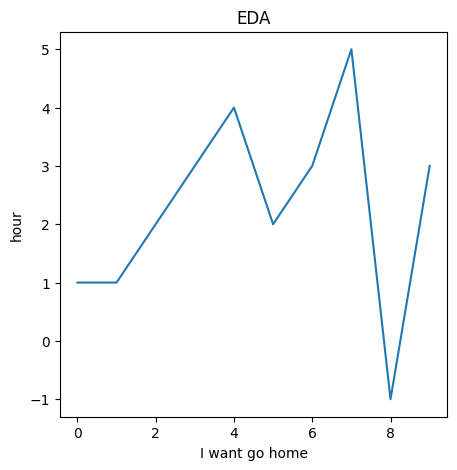

In [90]:
x = [0,1,2,3,4,5,6,7,8,9]
y = [1,1,2,3,4,2,3,5,-1,3]
plt.figure(figsize=(5,5))
plt.plot(x,y);

plt.title("EDA")
plt.xlabel("I want go home")
plt.ylabel("hour")
plt.show();

In [91]:
import numpy as np
t = np.arange(0, 12, 0.01)

In [92]:
def drawGraph():
    y = np.sin(t)
    c = np.cos(t)
    plt.figure(figsize=(10, 6))
    plt.plot(t,y, color="blue",
             linestyle="dashed",
             marker="o",
             markerfacecolor="red",
             markersize=12,
             label="sin")
    plt.plot(t,c, "g^" , label="cos")

    plt.grid()
    plt.legend()

    plt.title("Example of sinewave")
    plt.xlabel("time")
    plt.ylabel("Amplitude")

    plt.xlim([-0.5,13])
    plt.ylim([-2,2])
    
    plt.show();

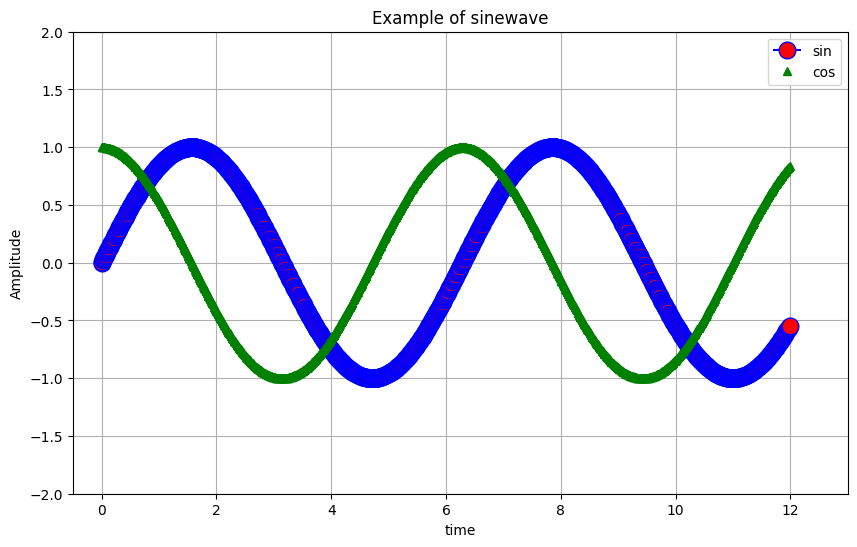

In [93]:
drawGraph()

### scatter plot

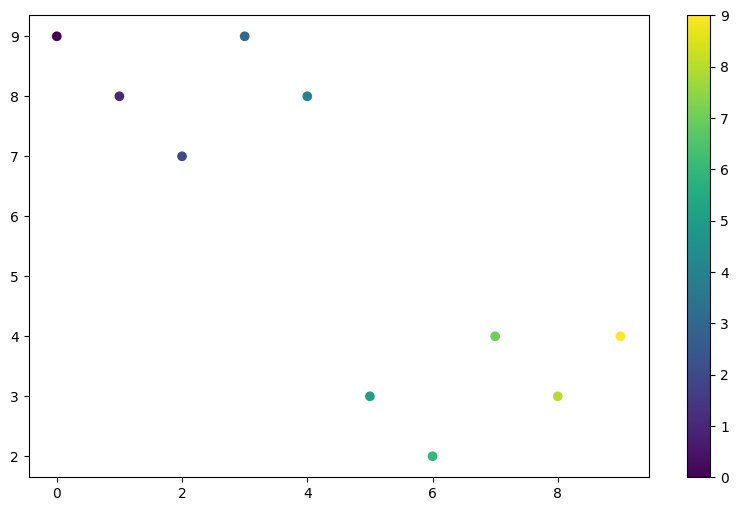

In [94]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, c=colormap)
plt.colorbar()
plt.show();

---

In [95]:
data_result.head(1)

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,
강남구,3238,561052,556164,4888,65060,0.87122,11.596073,0.57713


In [96]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

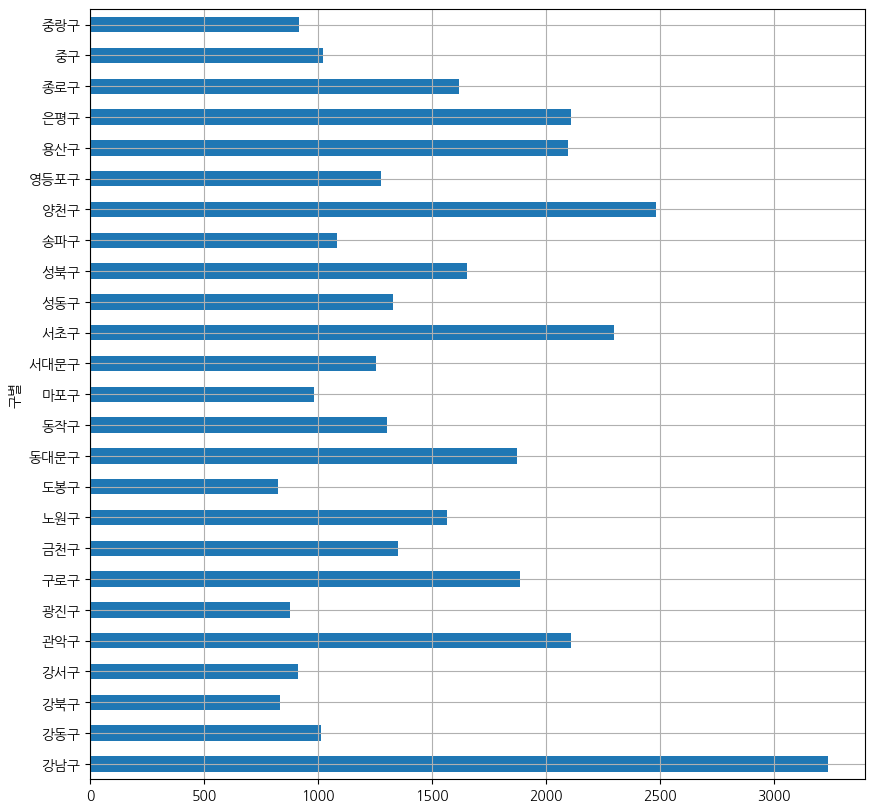

In [97]:
data_result["소계"].plot(kind="barh", grid=True, figsize=(10,10));

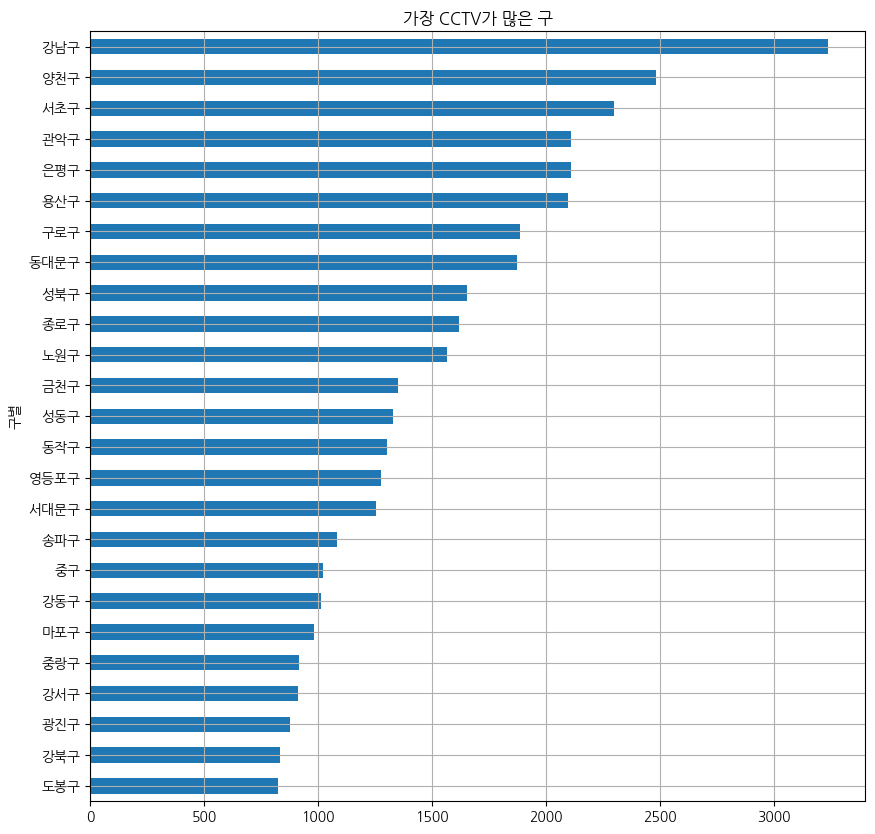

In [98]:
data_result["소계"].sort_values().plot(
    kind="barh", 
    grid=True,
    title="가장 CCTV가 많은 구",
    figsize=(10,10));

## 데이터의 경향을 분석해보자

### 인구수와 CCTV 개수 그려보기

In [104]:
def drawGraph_CCTV():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50)

    plt.title("인구수와 CCTV 개수")
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid()

    plt.show();

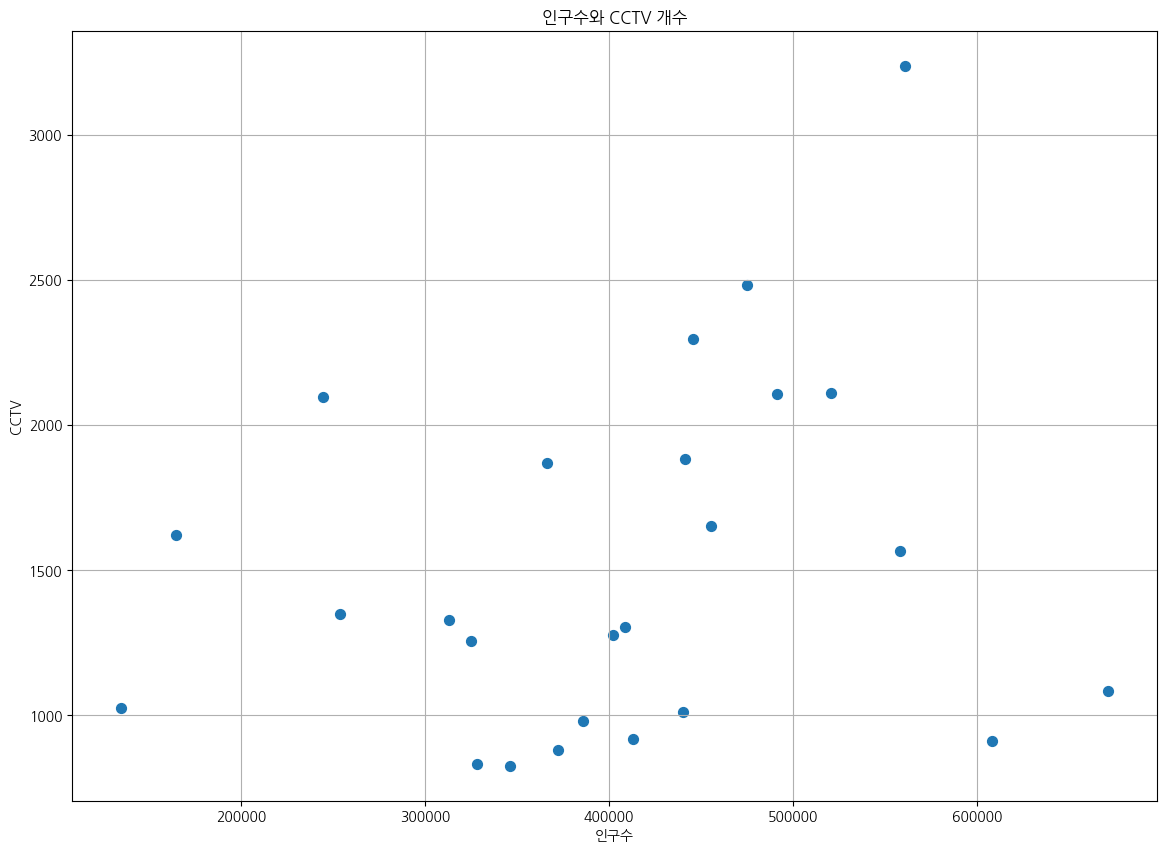

In [105]:
drawGraph_CCTV()

### 1차 직선 만들기
- numpy 가 제공하는 함수를 이용해서 1차 직선을 만들고, 그래프와 비교하기
- 절차
    - np.polyfit()
        - 직선을 구성하기 계수 계산
    - np.polyld()
        - polyfi() 함수에서 계산된 값으로 python 에서 사용할 함수로 만들어 줌

In [107]:
import numpy as np

In [109]:
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)

In [110]:
f1 = np.poly1d(fp1)

In [111]:
f1(200000)

1287.4691889669418

In [117]:
### 경향선을 그리기 위해 x축 데이터 생성
 - np.linspace(a, b, n): a부터 b까지 n개의 등간격 데이터를 생성

IndentationError: unexpected indent (583116363.py, line 2)

In [118]:
fx = np.linspace(100000, 700000, 100)

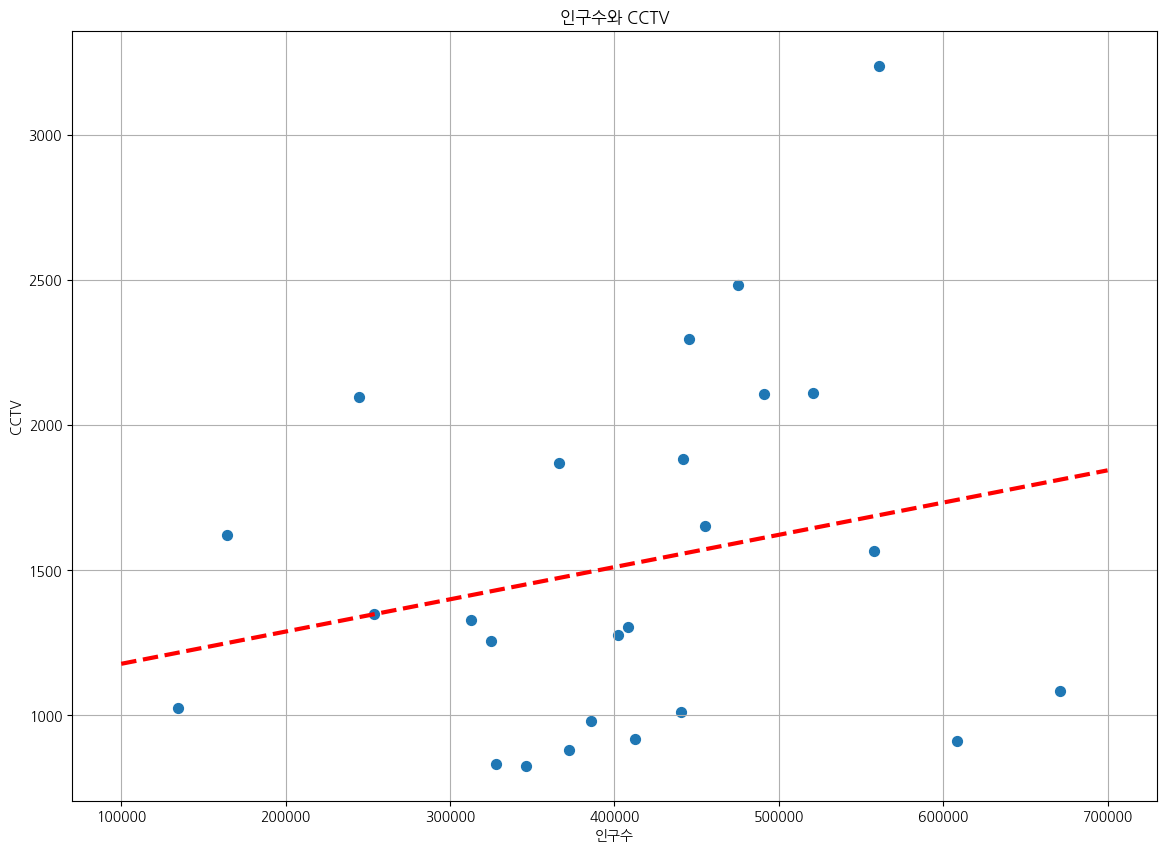

In [122]:
plt.figure(figsize=(14, 10))
plt.scatter(data_result["인구수"], data_result["소계"], s=50)
plt.plot(fx, f1(fx), ls="dashed", lw=3, color="r")

plt.title("인구수와 CCTV")
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()

plt.show();

### 경향과 오차를 만들기

In [128]:
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

In [125]:
data_result["오차"] =data_result["소계"] - f1(data_result["인구수"])

### 경향과 비교해서 데이터의 오차가 너무 나는 데이터 확인

In [129]:
df_sort_f = data_result.sort_values(by="오차", ascending=False)
df_sort_t = data_result.sort_values(by="오차", ascending=True)

In [130]:
df_sort_f.head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,
강남구,3238,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [132]:
df_sort_t.head(2)

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,
강서구,911,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628


In [133]:
from matplotlib.colors import ListedColormap

# colormap 을 사용자 정의(user define)로 세팅
color_step = ["#e74c3c", "#2ecc71", "#95a5a6", "#2ecc71", "#3498db", "#3498db"]
my_map = ListedColormap(color_step)

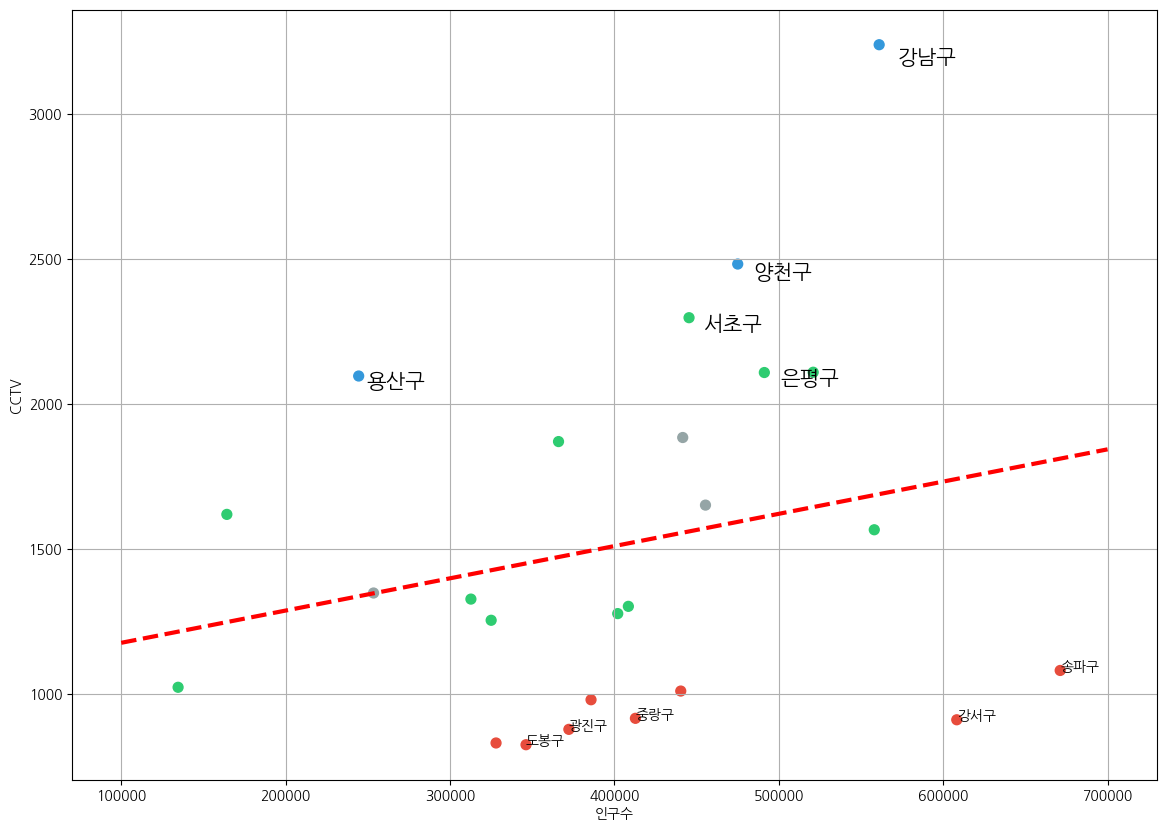

In [145]:
plt.figure(figsize=(14, 10))
plt.scatter(
    data_result["인구수"], 
    data_result["소계"], 
    c=data_result["오차"], 
    s=50, 
    cmap=my_map
)
plt.plot(fx, f1(fx), ls="dashed", lw=3, color="red")

for n in range(5):
    # 상위 5개
    plt.text(
        df_sort_f["인구수"][n] * 1.02, 
        df_sort_f["소계"][n] * 0.98, 
        df_sort_f.index[n],
        fontsize = 15
        )
    
    # 하위 5개
    plt.text(
        df_sort_t["인구수"][n], 
        df_sort_t["소계"][n], 
        df_sort_t.index[n]
    )

plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()

plt.show();

In [147]:
data_result.to_csv("../data/01_CCTV_Result.csv", sep=",", encoding="utf-8")